In [1]:
# train_rbf_cifar10.py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.layers import LeakyReLU  # Importar LeakyReLU

# Definição da classe RBFModel diretamente aqui
class RBFModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(RBFModel, self).__init__()
        self.flatten = layers.Flatten()  # Definir a camada Flatten aqui
        self.dense1 = layers.Dense(256)  # Camada adicional
        self.leaky_relu1 = LeakyReLU(alpha=0.1)  # Função Leaky ReLU
        self.dense2 = layers.Dense(128)  # Outra camada
        self.leaky_relu2 = LeakyReLU(alpha=0.1)  # Outra Leaky ReLU
        self.rbf_layer = layers.Dense(num_classes, activation=self.rbf_activation)

    def rbf_activation(self, x):
        return tf.exp(-tf.square(x))

    def call(self, inputs):
        x = self.flatten(inputs)  # Chamar a camada Flatten
        x = self.dense1(x)
        x = self.leaky_relu1(x)  # Aplicar Leaky ReLU
        x = self.dense2(x)
        x = self.leaky_relu2(x)  # Aplicar Leaky ReLU
        return self.rbf_layer(x)


In [3]:
# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 256.0
x_test = x_test.astype('float32') / 256.0

# Transformar os rótulos em um formato adequado
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Criar e compilar o modelo
model = RBFModel(num_classes=10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=40, batch_size=16, validation_split=0.2)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1737 - loss: 2.3110 - val_accuracy: 0.2538 - val_loss: 2.0164
Epoch 2/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.2752 - loss: 1.9459 - val_accuracy: 0.3017 - val_loss: 1.9018
Epoch 3/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3165 - loss: 1.8520 - val_accuracy: 0.3389 - val_loss: 1.8128
Epoch 4/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3434 - loss: 1.7791 - val_accuracy: 0.3501 - val_loss: 1.8019
Epoch 5/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3655 - loss: 1.7278 - val_accuracy: 0.3845 - val_loss: 1.7095
Epoch 6/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3779 - loss: 1.7019 - val_accuracy: 0.3951 - val_loss: 1.7247
Epoch 7/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4005 - loss: 1.6533 - val_accuracy: 0.4081 - val_loss: 1.6831
Epoch 8/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.4147 - loss: 1

Test accuracy: 0.4627


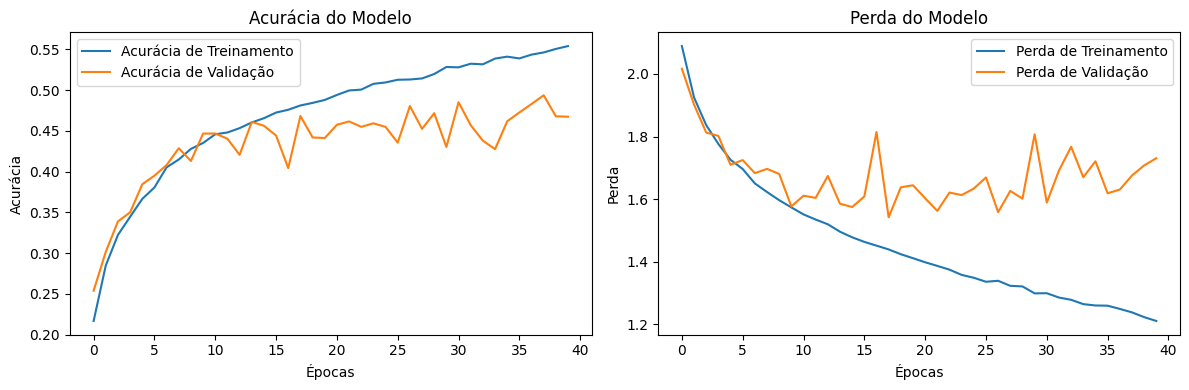

In [5]:
print(f'Test accuracy: {test_acc:.4f}')

# Gráficos de precisão e perda
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4626 - loss: 1.6916
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


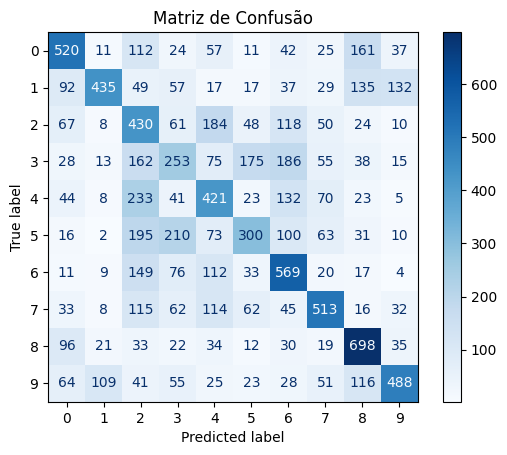

              precision    recall  f1-score   support

           0       0.54      0.52      0.53      1000
           1       0.70      0.43      0.54      1000
           2       0.28      0.43      0.34      1000
           3       0.29      0.25      0.27      1000
           4       0.38      0.42      0.40      1000
           5       0.43      0.30      0.35      1000
           6       0.44      0.57      0.50      1000
           7       0.57      0.51      0.54      1000
           8       0.55      0.70      0.62      1000
           9       0.64      0.49      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.46     10000
weighted avg       0.48      0.46      0.46     10000



In [8]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)

# Previsões
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converter para classes

# Verdadeiras classes
y_true = np.argmax(y_test, axis=1)

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print(report)

